<a href="https://colab.research.google.com/github/ShreyJais/Quantum-Computing/blob/main/Quantum_Cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Cryptography: Quantum Key Distribution

BB84 quantum key distribution (QKD) protocol. QKD uses quantum mechanics to generate a secure key for encrypting and decrypting messages.

##Install & Import Module

In [1]:
!pip install qiskit[all]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.8/539.8 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 14.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=3ae47b52412ae253d0afde62d65c

In [2]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.5 MB/s eta 0:00:00


In [3]:
#other useful packages
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.providers.basic_provider import BasicProvider

## Part 1: Encrypting and Decrypting a Message

### Pass Your Secret Message
* **Key Length:** Ensure your encryption key is at least twice as long as your message .
> If the key is shorter than the message, we will be forced to use parts of the key more than once.
* **Key Reuse:** Avoid reusing key segments within a single encryption process, as this can introduce vulnerabilities.
* **Message Length:** Shorter messages are generally more secure, as longer messages may require multiple key iterations, increasing the risk of pattern recognition.
By adhering to these principles, you can significantly enhance the security of your encrypted messages.

> Here, we can picked the initial key to be **x** times greater

In [12]:
#Super secret message
mes = input('Enter Super secret message:\t')
x = int(input('How many times greater the key len should be:\t'))
print('Your secret message:\t',mes)

#initial size of key
n = len(mes)*x

#break up message into smaller parts if length > 10
nlist = []
for i in range(n//10):
    nlist.append(10)
if n%10 != 0:
    nlist.append(n%10)

print('Initial key length:\t',n)

How many times greater the key len should be:	3
Your secret message:	 Shrey
Initial key length:	 15


### Part 1: Transfering data Using BB84 QKD
**Scenario:**
* Alice wants to send a secret message to Bob.
* They need a shared secret key to encrypt and decrypt the message.
* But, there's a risk that Eve, an eavesdropper, might be listening in.

**Here's how QKD helps in this Scenario:**
1. **Creating a Random Key:** Alice uses quantum mechanics to generate a random string of 0s and 1s – this is the initial secret key.
2. **Turning Bits into Qubits:** Alice converts each bit of the key into a qubit (a quantum bit). Think of qubits as tiny particles that can be in multiple states at once.
3. **Sending Qubits with a Twist:** Alice sends these qubits to Bob. But, she randomly applies a special operation (rotation) to some of them. This creates "noise" and makes the key appear random to anyone listening in.
4. **Bob's Random Rotations:** Bob receives the qubits and also applies random rotations to some of them, but in the opposite direction of Alice's rotations.
5. **Comparing Notes:** Alice and Bob publicly share information about which qubits they rotated. When they both performed the same operation on a qubit (either both rotated or both didn't), they know that qubit's original value made it to Bob safely.
6. **Creating the Final Key:** Alice and Bob use this information to create their final secret key. They discard the qubits where their operations didn't match, as those might have been intercepted by Eve.
**Why it Works:**
* **Eve's Interference:** If Eve tries to intercept and measure the qubits, she'll disturb their quantum state. This disturbance will introduce errors that Alice and Bob can detect when they compare their rotations.
* **Security Guarantee:** Because of the principles of quantum mechanics, Eve cannot perfectly copy or measure the qubits without altering them. This makes QKD a very secure way to share secret keys.
In essence, QKD uses the weirdness of quantum mechanics to ensure that Alice and Bob can share a secret key without Eve knowing it, even if she tries to eavesdrop.

<img src='https://github.com/qiskit-community/qiskit-community-tutorials/blob/a6206e42a770a04cb1f650b3b1a20ea1625152e4/awards/teach_me_qiskit_2018/quantum_cryptography_qkd/QKDnoEve.png?raw=1'>
Here we see Alice sending the initial key to Bob. She sends her qubits and rotates them based on her rotation string. Bob rotates the incoming qubits based on his rotation string and measures the qubits.

### Step 1: Alice Generates a Random Key
For the Generating a super secret key to encrypt messages we will using the quantum mechanics!

Imagine a special coin that can be heads and tails at the same time. Scientists call this "superposition."

Alice uses this trick with quantum particles to create a random string of 0s and 1s



In [13]:
# Make random strings of length string_length

def randomStringGen(string_length):
    output_list = []
    output = ''
    backend = AerSimulator()
    circuits = ['rs']
    n = string_length
    temp_n = 10
    temp_output = ''
    for i in range(math.ceil(n/temp_n)):
        #initialize quantum registers for circuit
        q = QuantumRegister(temp_n, name='q')
        c = ClassicalRegister(temp_n, name='c')
        rs = QuantumCircuit(q, c, name='rs')

        #create temp_n number of qubits all in superpositions
        for i in range(temp_n):
            rs.h(q[i]) #the .h gate is the Hadamard gate that makes superpositions
            rs.measure(q[i],c[i])

        #execute circuit and extract 0s and 1s from key
        new_circuit = transpile(rs, backend)
        result = backend.run(new_circuit, shots=1).result()
        counts = result.get_counts(rs)
        result_key = list(result.get_counts(rs).keys())
        temp_output = result_key[0]
        output += temp_output

    #return output clipped to size of desired string length
    return output[:n]

In [14]:
key = randomStringGen(n)
print('Initial key: ',key)

Initial key:  101010111110001


### Steps 2-4: Send Alice's Qubits to Bob

In [15]:
#generate random rotation strings for Alice and Bob
Alice_rotate = randomStringGen(n)
Bob_rotate = randomStringGen(n)
print("Alice's rotation string:",Alice_rotate)
print("Bob's rotation string:  ",Bob_rotate)
backend = AerSimulator()
shots = 1
circuits = ['send_over']
Bob_result = ''

for ind,l in enumerate(nlist):
    #define temp variables used in breaking up quantum program if message length > 10
    if l < 10:
        key_temp = key[10*ind:10*ind+l]
        Ar_temp = Alice_rotate[10*ind:10*ind+l]
        Br_temp = Bob_rotate[10*ind:10*ind+l]
    else:
        key_temp = key[l*ind:l*(ind+1)]
        Ar_temp = Alice_rotate[l*ind:l*(ind+1)]
        Br_temp = Bob_rotate[l*ind:l*(ind+1)]

    #start up the quantum circuit information
    q = QuantumRegister(l, name='q')
    c = ClassicalRegister(l, name='c')
    send_over = QuantumCircuit(q, c, name='send_over')

    for i,j,k,n in zip(key_temp,Ar_temp,Br_temp,range(0,len(key_temp))):
        i = int(i)
        j = int(j)
        k = int(k)
        if i > 0:
            send_over.x(q[n])
        #Look at Alice's rotation string
        if j > 0:
            send_over.h(q[n])
        #Look at Bob's rotation string
        if k > 0:
            send_over.h(q[n])
        send_over.measure(q[n],c[n])

    #execute quantum circuit
    new_circuit = transpile([send_over], backend)
    result_so = backend.run(new_circuit, shots=shots).result()
    counts_so = result_so.get_counts(send_over)
    result_key_so = list(result_so.get_counts(send_over).keys())
    Bob_result += result_key_so[0][::-1]

print("Bob's results: ", Bob_result)

Alice's rotation string: 000010111001111
Bob's rotation string:   101000000110100
Bob's results:  100010001001010


### Steps 5-6: Compare Rotation Strings and Make Keys

In [17]:
def makeKey(rotation1,rotation2,results):
    key = ''
    count = 0
    for i,j in zip(rotation1,rotation2):
        if i == j:
            key += results[count]
        count += 1
    return key

Akey = makeKey(Bob_rotate,Alice_rotate,key)
Bkey = makeKey(Bob_rotate,Alice_rotate,Bob_result)

print("Alice's key:",Akey)
print("Bob's key:  ",Bkey)

Alice's key: 0000
Bob's key:   0000


### Pause
We see that using only the public knowledge of Bob's and Alice's rotation strings, Alice and Bob can create the same identical key based on Alice's initial random key and Bob's results.

### Encrypt (and decrypt) using quantum key
We can now use our secret key to encrypt and decrypt messages!! (of length less than the key).

In [18]:
#make key same length has message
shortened_Akey = Akey[:len(mes)]
encoded_m=''

#encrypt message mes using encryption key final_key
for m,k in zip(mes,shortened_Akey):
    encoded_c = chr(ord(m) + 2*ord(k) % 256)
    encoded_m += encoded_c
print('encoded message:  ',encoded_m)

#make key same length has message
shortened_Bkey = Bkey[:len(mes)]

#decrypt message mes using encryption key final_key
result = ''
for m,k in zip(encoded_m,shortened_Bkey):
    encoded_c = chr(ord(m) - 2*ord(k) % 256)
    result += encoded_c
print('recovered message:',result)

encoded message:   ³ÈÒÅ
recovered message: Shre


## Part 2: Eve the Eavesdropper
**Scenario:**
Eve, the eavesdropper, is trying to intercept the quantum communication between Alice and Bob to steal their secret key.
* **Steps:**
1. **Eve Intercepts:** When Alice sends her qubits to Bob, Eve intercepts them and measures them. This is her attempt to gain information about the key.
2. **Eve Deceives:** To avoid being detected, Eve prepares new qubits based on the results of her measurements and sends them to Bob. She hopes these qubits will mimic the original ones sent by Alice.
3. **Key Generation:** Bob, unaware of Eve's interference, receives the qubits (from Eve) and performs his rotations and measurements, just as he would in a normal QKD exchange. Alice and Bob then use their rotation information to create their respective keys.
4. **Spot Check:** Alice and Bob randomly select a portion of their keys to compare publicly. This is a crucial step to detect Eve's presence.
5. **Eve Detected:** Because Eve's measurements disturbed the original qubits, there's a chance that the portions of Alice and Bob's keys won't match. If they find any discrepancies, they know Eve was eavesdropping and their communication is compromised.
6. **Key Refinement:** If Eve is detected, Alice and Bob discard the publicly shared portions of their keys, as they are no longer secret. They use the remaining parts (which are hopefully long enough) to encrypt and decrypt their messages.


<img src="https://github.com/qiskit-community/qiskit-community-tutorials/blob/a6206e42a770a04cb1f650b3b1a20ea1625152e4/awards/teach_me_qiskit_2018/quantum_cryptography_qkd/QKD.png?raw=1">
Here we see Alice sending her qubits, rotationing them based on her rotation string, and Eve intercepting the transmittion. Eve then sending her results onto Bob who--like normal--rotates and measures the qubits.

### Step 1: Eve intercepts Alice's transmission

The code below has Alice sending her qubits and Eve intercepting them. It then displays the results of Eve's measurements.

In [19]:
backend = AerSimulator()
shots = 1
circuits = ['Eve']

Eve_result = ''
for ind,l in enumerate(nlist):
    #define temp variables used in breaking up quantum program if message length > 10
    if l < 10:
        key_temp = key[10*ind:10*ind+l]
        Ar_temp = Alice_rotate[10*ind:10*ind+l]
    else:
        key_temp = key[l*ind:l*(ind+1)]
        Ar_temp = Alice_rotate[l*ind:l*(ind+1)]

    #start up the quantum circuit information
    q = QuantumRegister(l, name='q')
    c = ClassicalRegister(l, name='c')
    Eve = QuantumCircuit(q, c, name='Eve')

    #prepare qubits based on key; add Hadamard gates based on Alice's and Bob's
    #rotation strings
    for i,j,n in zip(key_temp,Ar_temp,range(0,len(key_temp))):
        i = int(i)
        j = int(j)
        if i > 0:
            Eve.x(q[n])
        if j > 0:
            Eve.h(q[n])
        Eve.measure(q[n],c[n])

    #execute
    new_circuit = transpile(Eve, backend)
    result_eve = backend.run(new_circuit, shots=shots).result()
    counts_eve = result_eve.get_counts()
    result_key_eve = list(result_eve.get_counts().keys())
    Eve_result += result_key_eve[0][::-1]

print("Eve's results: ", Eve_result)

Eve's results:  101010001111011


### Step 2: Eve deceives Bob
Eve sends her measured qubits on to Bob to deceive him! Since she doesn't know which of the qubits she measured were in a superposition or not, she doesn't even know whether to send the exact values she measured or opposite values. In the end, sending on the exact values is just as good a deception as mixing them up again.

In [20]:
backend = AerSimulator()
shots = 1
circuits = ['Eve2']

Bob_badresult = ''
for ind,l in enumerate(nlist):
    #define temp variables used in breaking up quantum program if message length > 10
    if l < 10:
        key_temp = key[10*ind:10*ind+l]
        Eve_temp = Eve_result[10*ind:10*ind+l]
        Br_temp = Bob_rotate[10*ind:10*ind+l]
    else:
        key_temp = key[l*ind:l*(ind+1)]
        Eve_temp = Eve_result[l*ind:l*(ind+1)]
        Br_temp = Bob_rotate[l*ind:l*(ind+1)]

    #start up the quantum circuit information
    q = QuantumRegister(l, name='q')
    c = ClassicalRegister(l, name='c')
    Eve2 = QuantumCircuit(q , c, name='Eve2')

    #prepare qubits
    for i,j,n in zip(Eve_temp,Br_temp,range(0,len(key_temp))):
        i = int(i)
        j = int(j)
        if i > 0:
            Eve2.x(q[n])
        if j > 0:
            Eve2.h(q[n])
        Eve2.measure(q[n],c[n])

    #execute
    new_circuit = transpile(Eve2, backend)
    result_eve = backend.run(new_circuit, shots=shots).result()
    counts_eve = result_eve.get_counts()
    result_key_eve = list(result_eve.get_counts().keys())
    Bob_badresult += result_key_eve[0][::-1]

print("Bob's previous results (w/o Eve):",Bob_result)
print("Bob's results from Eve:\t\t ",Bob_badresult)

Bob's previous results (w/o Eve): 100010001001010
Bob's results from Eve:		  101010001011011


### Step 4: Spot Check
**The Spot Check:**

* **Random Choice:** They randomly pick a few bits from their keys.
* **Public Comparison:** They publicly reveal these bits.
* **Spot the Difference:** If their bits match perfectly, it's likely Eve hasn't interfered. But if there's a mismatch, it's a red flag! Eve's meddling might have disturbed the delicate quantum state of the qubits.

**The Check Key:**

* To automate this process, they create a special "check key." It's like a secret code that tells them which bits to compare. If the check key bit is a 1, they compare the corresponding bits in their keys.

By using this spot check, Alice and Bob can ensure the security of their secret key, making their quantum communication truly secure.

In [21]:
#make keys for Alice and Bob
Akey = makeKey(Bob_rotate,Alice_rotate,key)
Bkey = makeKey(Bob_rotate,Alice_rotate,Bob_badresult)
print("Alice's key:   ",Akey)
print("Bob's key:     ",Bkey)

check_key = randomStringGen(len(Akey))
print('spots to check:',check_key)

Alice's key:    0000
Bob's key:      0000
spots to check: 0101


### Steps 5-7: Compare strings and detect Eve
Alice and Bob compare the subsections of their keys. If they notice any discrepancy, they know that Eve was trying to intercept their message. They create new keys by throwing away the parts they shared publicly. It's possible that by throwing these parts away, they will not have a key long enough to encrypt the message and they will have to try again.

In [23]:
#find which values in rotation string were used to make the key
Alice_keyrotate = makeKey(Bob_rotate,Alice_rotate,Alice_rotate)
Bob_keyrotate = makeKey(Bob_rotate,Alice_rotate,Bob_rotate)

# Detect Eve's interference
#extract a subset of Alice's key
sub_Akey = ''
sub_Arotate = ''
count = 0
for i,j in zip(Alice_rotate,Akey):
    if int(check_key[count]) == 1:
        sub_Akey += Akey[count]
        sub_Arotate += Alice_keyrotate[count]
    count += 1

#extract a subset of Bob's key
sub_Bkey = ''
sub_Brotate = ''
count = 0
for i,j in zip(Bob_rotate,Bkey):
    if int(check_key[count]) == 1:
        sub_Bkey += Bkey[count]
        sub_Brotate += Bob_keyrotate[count]
    count += 1
print("subset of Alice's key:",sub_Akey)
print("subset of Bob's key:  ",sub_Bkey)

#compare Alice and Bob's key subsets
secure = True
for i,j in zip(sub_Akey,sub_Bkey):
    if i == j:
        secure = True
    else:
        secure = False
        break;
if not secure:
    print('Eve detected!')
else:
    print('Eve escaped detection!')

#sub_Akey and sub_Bkey are public knowledge now, so we remove them from Akey and Bkey
if secure:
    new_Akey = ''
    new_Bkey = ''
    for index,i in enumerate(check_key):
        if int(i) == 0:
            new_Akey += Akey[index]
            new_Bkey += Bkey[index]
    print('new A and B keys: ',new_Akey,new_Bkey)
    if(len(mes)>len(new_Akey)):
        print('Your new key is not long enough.')

subset of Alice's key: 00
subset of Bob's key:   00
Eve escaped detection!
new A and B keys:  00 00
Your new key is not long enough.


## Probability of Detecting Eve
The longer the key, the more likely you will detect Eve. In fact, the probability goes up as a function of $1 - (3/4)^n$ where n is the number of bits Alice and Bob compare in their spot check. So, the longer the key, the more bits you can use to compare and the more likely you will detect Eve.

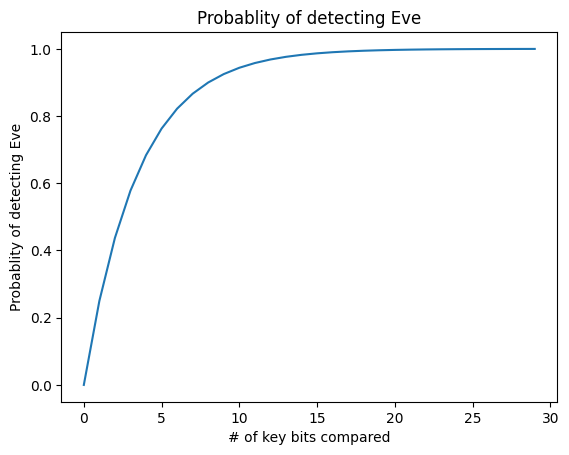

In [22]:
x = np.arange(0., 30.0)
y = 1-(3/4)**x
plt.plot(y)
plt.title('Probablity of detecting Eve')
plt.xlabel('# of key bits compared')
plt.ylabel('Probablity of detecting Eve')
plt.show()